# 사이킷런

#### 사이킷런 특징

*  파이썬 기반의 다른 머신러닝 패키지도 사이킷런 스타일의 API를 지향할 정도로 쉽고 가장 파이썬스러운 API를 제공

*  머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크, API를 제공

*  오랜 기간 실전 환경에서 검증됐으며, 매우 많은 환경에서 사용되는 성숙한 라이브러리.

# 첫 번째 머신러닝 - 붓꽃 품종 예측

붓꽃 데이터 세트로 붓꽃 품종을 분류(Classification)한다.

붓꽃 데이터 세트는 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처(Feature)를 기반으로 꽃의 품종을 예측.



분류(Classification)는 대표적인 지도학습(Supervised Learning) 방법의 하나.

지도학습은 학습을 위한 다양한 피처와 분류 결정값인 레이블(Label) 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측한다.

즉 지도 학습은 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식.

*  sklearn.datasets : 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임

*  sklearn.tree : 트리 기반 ML 알고리즘을 구현한 클래스 모임

*  sklearn.model_selection : 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임

하이퍼 파라미터란 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하라는 파라미터들을 통칭하며, 하이퍼 파라미터를 통해 머신러닝 알고리즘의 성능을 튜닝할 수 있다.

In [1]:
from sklearn.datasets import load_iris                  # 붓꽃 데이터 생성
from sklearn.tree import DecisionTreeClassifier         # ML알고리즘 : 의사결정트리
from sklearn.model_selection import train_test_split    # 데이터 세트를 학습 데이터와 테스트 데이터로 분리

In [2]:
import pandas as pd

# 붓꽃 데이터 세트 로딩
iris = load_iris()

# iris.data는 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있음
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정값) 데이터를 numpy로 가지고 있음
iris_label = iris.target
print('iris target 값:', iris_label)
print('iris target 명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target 값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


레이블(Label, 결정값)은 0, 1, 2 세 가지 값으로 되어있고 0이 Setosa, 1이 Versicolor, 2가 Virginica 품종을 의미한다.

In [3]:
# 학습용 데이터와 테스트용 데이터 분리
# 학습 데이터로 학습된 모델이 얼마나 뛰어난 성능을 가지는지 평가하기 위해 분리
# train_test_split(), 파라미터 : test_size
# test_size : 입력값의 비율로 분할, 예) 0.2 => 학습 데이터 80%, 테스트 데이터 20%
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

#### train_test_split() 파라미터

*  iris_data : 피처 데이터 세트
*  iris_label : 레이블 데이터 세트
*  test_size=0.2 : 전체 데이터 세트 중 테스트 데이터 비율
*  random_state : 호출할 때마다 같은 학습/테스트 용 데이터를 생성하기 위해 주어지는 난수 발생 값. train_test_split()은 호출 시 무작위로 데이터를 분리하므로 random_state를 지정하지 않으면 수행할 때마다 다른 학습/테스트 용 데이터를 만들 수 있다. 숫자를 지정할 때는 어떤 값을 지정해도 상관없다.

---

train_test_split()은 학습 피처 데이터 세트를 X_train으로, 테스트용 피처 데이터 세트를 X_test로, 학습용 레이블 데이터 세트를 y_train으로, 테스트용 레이블 데이터 세트를 y_test로 반환.



In [4]:
# 의사 결정 트리를 이용해 학습과 예측 수행
# DecisionTreeClassifier 객체 생성 시 입력된 random_state도 지정
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [5]:
# 학습된 DecisionTreeClassifier 객체를 이용하여 예측 수행
# 예측은 반드시 학습 데이터가 아닌 다른 데이터를 이용해야 한다.
# DecisionTreeClassifier 객체의 predict() 메서드에 테스트용 피처 데이터 세트를 입력하여 예측값 반환
pred = dt_clf.predict(X_test)

In [6]:
# 예측 결과를 기반으로 DecisionTreeClassifier의 예측 성능 평가
# 정확도 측정. accuracy_score()
from sklearn.metrics import accuracy_score
print("예측 정확도 : {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9333


#### 붓꽃 데이터 분류 프로세스

1. 데이터 세트 분리 : 데이터를 학습 데이터와 테스트 데이터로 분리

2. 모델 학습 : 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델 학습

3. 예측 수행 : 학습된 ML 모델을 이용해 테스트 데이터의 분류(즉, 붓꽃 종류) 예측

4. 평가 : 예측된 결과값과 테스트 데이터의 실제 결과값 비교하여 ML 모델 성능 평가



# 사이킷런 기반 프레임워크

fit() : ML 모델 학습

predict() : 학습된 모델의 예측

지도학습의 주요 두 축인 분류(Classification)과 회귀(Regression)의 다양한 알골지믕르 구현한 모든 사이킷런 클래스는 fit()과 predict()만을 이용하여 간단하게 학습과 예측 결과를 반환한다.

사이킷런에서는 분류 알고리즘을 구현한 클래스를 Classifier, 회귀 알고리즘을 구현한 클래스는 Regressor로 지칭한다.

이 Classifier과 Regressor를 합쳐서 Estimator 클래스라고 부른다. 즉, 지도학습의 모든 알고리즘을 구현한 클래스를 통칭해서 Estimator라고 부른다.

cross_val_score()와 같은 evaluation 함수, GridSearchCV와 같은 하이퍼 파라미터 튜닝을 지원하는 클래스의 경우 Estimator를 인자로 받는다. Estimator에 대해서 cross_val_score(), GridSearchCV.fit() 함수 내에서 이 Estimator의 fit()과 predict()를 호출해서 평가를 하거나 하이퍼 파라미터 튜닝을 수행하는 것이다.

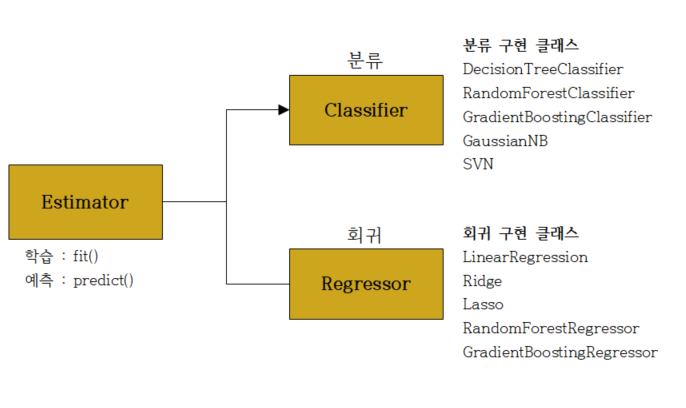

사이킷런에서 비지도학습인 차원 축소, 클러스터링, 피처 추출(Feature Extraction) 등을 구현한 클래스 역시 대부분 fit()과 transform()을 적용한다. 비지도학습과 피처 추출에서 fit()은 지도 학습의 fit()과 같이 학습을 의미하는 것이 아닌 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업이다.

fit()으로 변환을 위한 사전 구조를 맞추면 이후 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 실제 작업은 transform()으로 수행한다.

사이킷런은 fit()과 transform()을 하나로 결합한 fit_transform()도 함께 제공한다.

#### 사이킷런 내장된 예제 데이터 세트

* datasets.load_boston() : 회귀 용도 이며, 미국 보스턴의 집 피어들과 가격에 대한 데이터 세트

* datasets.load_breast_cancer() : 분류 용도이며, 위스콘신 유방암 피처들과 악성/음성 레이블 데이터 세트

* datasets.load_diabetes() : 회귀 용도이며, 당뇨 데이터 세트

* datasets.load_digits() : 분류 용도이며, 0에서 9까지의 숫자 이미지 픽셀 데이터 세트

* datasets.load_iris() : 분류 용도이며, 붓꽃에 대한 피처를 가진 데이터 세트

fetch 계열 명령은 데이터 크기가 커서 패키지에 내장되어 있지 않고 인터넷에서 내려받아 홈 디렉터리 아래의 scikit_learn_data라는 서브 디렉터리에 저장한 후 추후 불러들이는 데이터.

* fetch_covtype() : 회귀 분석용 토지 조사 자료
* fetch_20Newsgroups() : 뉴스 그룹 텍스트 자료
* fetch_olivetti_faces() : 얼굴 이미지 자료
* fetch_lfw_people() : 얼굴 이미지 자료
* fetch_lfw_pairs() : 얼굴 이미지 자료
* fetch_rcv1() : 로이터 뉴스 말뭉치
* fetch_mldata() : ML 웹사이트에서 다운로드

분류와 클러스터링을 위한 표본 데이터 생성기

* datasets.make_classifications()

: 분류를 위한 데이터 세트를 만든다. 특히 높은 상관도, 불필요한 속성 등의 노이즈 효과를 위한 데이터를 무작위로 생성한다.

* datasets.make_blobs()

: 클러스터링을 위한 데이터 세트를 무작위로 생성해준다. 군집 지정 개수에 따라 여러 가지 클러스터링을 위한 데이터 세트를 쉽게 만들어준다.

#### 분류나 회귀를 위한 연습용 예제 데이터 구성

사이킷런에 내장된 이 데이터 세트는 일반적으로 딕셔너리 형태로 되어있다.

* data : 피처의 데이터 세트
* target : 분류 시 레이블 값, 회귀일 때는 숫자 결괏값 데이터 세트
* target_names : 개별 레이블의 이름
* feature_names : 피처의 이름
* DESCR은 데이터 세트에 대한 설명과 각 피처의 설정

data, target은 넘파이 배열이며, target_names, feature_names는 넘파이 배열 또는 파이썬 리스트. DESCR은 스트링 타입이다.

피처의 데이터 값을 반환받기 위해서는 내장 데이터 세트 API를 호출한 뒤에 그 Key값을 지정하면 된다.

In [7]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

# <class 'sklearn.utils.Bunch'>
# Bunch 클래스는 파이썬 딕셔너리 자료형과 유사

<class 'sklearn.utils.Bunch'>


In [8]:
keys = iris_data.keys()
print('데이터 세트 키 :',keys)

데이터 세트 키 : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


데이터 키는 피쳐들의 데이터 값을 가리킨다. 데이터 세트가 딕셔너리 형태이기 때문에 피처 데이터값을 추출하기 위해서는 데이터 세트.data(또는 데이터['data'])를 이용하면 된다. (target, features_names, DESCR key 또 한 마찬가지)

In [9]:
print('features_names의 type :',type(iris_data.feature_names))
print('\nfeatures_names의 shape :',len(iris_data.feature_names))
print(iris_data.feature_names)

print('\ntarget_names의 type :',type(iris_data.target_names))
print('\ntarget_names의 shape :',len(iris_data.target_names))
print(iris_data.target_names)

print('\ndata의 type :', type(iris_data.data))
print('\ndata의 shape :', iris_data.data.shape)
print(iris_data['data']) # print(iris_data.data)

print('\ntarget의 type :',type(iris_data.target))
print('\ntarget의 shape :',iris_data.target.shape)
print(iris_data.target) # print(iris_data['target'])

features_names의 type : <class 'list'>

features_names의 shape : 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

target_names의 type : <class 'numpy.ndarray'>

target_names의 shape : 3
['setosa' 'versicolor' 'virginica']

data의 type : <class 'numpy.ndarray'>

data의 shape : (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]

# Model Selection 모듈

#### 학습/테스트 데이터 세트 분리 - train_test_split()

테스트 데이터 세트를 이용하지 않고 학습 데이터 세트로만 학습하고 예측해보자

In [10]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 예측 수행
pred = dt_clf.predict(train_data)
print(accuracy_score(train_label, pred))

1.0


정확도 100%

위 결과가 나온 이유는 이미 학습한 학습 데이터 세트를 기반으로 예측했기 때문이다. 따라서 예측을 수행하는 데이터 세트는 학습을 수행한 학습용 데이터 세트가 아닌 전용의 테스트 데이터 세트여야 한다.

#### train_test_split 파라미터

* test_size : 전체 데이터에서 테스트 데이터 세트 비율 결정
* train_size : 전체 데이터에서 학습용 데이터 세트 비율 결정. test_size를 사용하면 안써도 된다.
* shuffle : 데이터를 분리하기 전에 데이터를 미리 섞을지 결정. 디폴트는 True. 데이터를 분산시켜 좀 더 효율적인 학습 및 테스트 데이터 세트를 만든다.
* random_state : 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수값. 

train_test_split()의 반환값은 튜플 형태다. 순차적으로 학습/테스트용 데이터의 피처 데이터 세트, 학습/테스트용 레이블 데이터 세트가 반환된다.  

In [11]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=121)

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print(accuracy_score(y_test, pred))

0.9555555555555556


#### 교차 검증

알고리즘을 학습시키는학습 데이터와 이에 대한 예측 성능을 평가하기 위한 별도의 테스트용 데이터가 필요하다. 하지만 이것 역시 과적합(Overfitting)에 취약한 약점을 가질 수 있다.

과적합은 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우, 예측 성능이 과도하게 떨어지는 것을 말한다.

그런데 고정된 학습 데이터와 테스트 데이터로 평가하면 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델을 유도하는 경향이 생기게 된다.

결국 해당 테스트 데이터에만 과적합되는 학습 모델이 만들어져 다른 테스트용 데이터가 들어올 경우에는 성능이 저하된다. 이런 문제점을 개선하기 위해 교차 검증을 이용해 더 다양한 학습과 평가를 수행

1. 학습 데이터를 다시 분할하여 학습 데이터와 학습된 모델의 성능을 일차 평가하는 검증 데이터로 나눈다.

2. 분할 -> 학습 데이터 세트와 검증 데이터 세트

3. 모든 학습/검증 과정이 완료된 후 최종적으로 성능 평가하기 위한 데이터 세트(테스트 데이터 세트)

#### K 폴드 교차 검증

K 폴드 교차 검증은 가장 보편적으로 사용되는 교차 검증 기법이다. 먼저 K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법이다.

예) 5 폴드 교차 검증

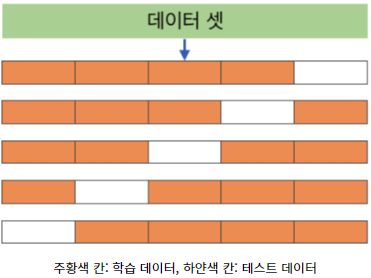

5개의 폴드된 데이터 세트를 학습과 검증을 위한 데이터 세트로 변경하면서 5번 평가 수행한 뒤, 이 5개의 평가를 평균한 결과를 가지고 예측 성능을 평가한다.

먼저 데이터 세트를 5등분한다. 그리고 첫 번째 반복에는 처음부터 4개 등분을 학습 데이터 세트, 마지막 5번째 등분 하나를 검증 데이터 세트로 설정하고 학습 데이터 세트에서 학습 수행, 검증 데이터 세트에서 평가를 수행한다. 이후 돌아가면서 반복 수행합니다. 5개의 예측 평가를 구했으면 이를 평균하여 K 폴드 평가 결과로 반영하면 된다.

사이킷런에서는 K 폴드 교차 검증 프로세스를 구현하기 위해 KFold와 StratifiedKFold 클래스를 제공한다.

In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5) # 학습용 데이터 세트 120(4/5), 테스트 데이터 세트 30(1/5)
cv_accuracy = []
print('붓꽃 데이터 크기 :',features.shape[0])

붓꽃 데이터 크기 : 150


In [13]:
n_iter = 0

# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index, in kfold.split(features):
    # kfold.split()으로 반환된  인덱스를 이용해 학습용 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 :{3}'.format(n_iter, accuracy, train_size, test_size))
    print('\n{0} 검증 데이터 세트 인덱스 :{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도 :',np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 :30

1 검증 데이터 세트 인덱스 :[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기 :30

2 검증 데이터 세트 인덱스 :[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기 : 120, 검증 데이터 크기 :30

3 검증 데이터 세트 인덱스 :[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기 : 120, 검증 데이터 크기 :30

4 검증 데이터 세트 인덱스 :[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기 : 120, 검증 데이터 크기 :30

5 검증 데이터 세트 인덱스 :[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도 : 0.9


#### Stratified K 폴드

Stratified K 폴드는 불균형한(imbalanced) 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식. 불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 매우적어서 값의 분포가 한쪽으로 치우는 것을 말한다. 

Stratified K 폴드는 K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결해준다. 이를 위해 Stratified K 폴드는 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배한다.

먼저 K 폴드의 문제점을 확인해보자


In [14]:
import pandas as pd
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [15]:
# KFold를 생성하고, 각 교차 검증 시마다 생성되는 학습/검증 레이블 데이터 값의 분포도 확인
kfold=KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증 :', n_iter)
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증 : 1
학습 레이블 데이터 분포:
 2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증 : 2
학습 레이블 데이터 분포:
 2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증 : 3
학습 레이블 데이터 분포:
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


교차 검증 시마다 3개의 폴드 세트로 만들어지는 학습 레이블과 검증 레이블이 완전히 다른 값으로 추출되었다. 첫 번째 교차 검증에서는 학습 레이블이 1, 2 값이 각각 50개가 추출되었고, 검증 레이블 0값이 50개 추출되었다. 학습 레이블이 1, 2 밖에 없어 제대로된 학습을 하지 못하고, 학습 모델은 절대 0을 예측하지 못한다.

StratifiedKFold는 이렇게 KFold로 분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반여하지 못하는 문제를 해결해준다. 이번에는 동일한 데이터 분할을 StratifiedKFold로 수행하고 학습/검증 레이블 데이터의 분포도를 확인해보자.

In [16]:
# StratifiedKFold는 레이블 데이터 분포도에 따라 학습/검증 데이터를 나누기 때문에
# split() 메서드 인자로 피처 데이터 세트와 레이블 데이터 세트가 필요하다
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0
for train_index, test_index in skf.split(iris_df, iris_df['label']): 
    n_iter+=1
    label_train=iris_df['label'].iloc[train_index]
    label_test=iris_df['label'].iloc[test_index]
    print('## 교차 검증 :', n_iter)
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증 : 1
학습 레이블 데이터 분포:
 2    34
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
0    17
2    16
Name: label, dtype: int64
## 교차 검증 : 2
학습 레이블 데이터 분포:
 1    34
2    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
0    17
1    16
Name: label, dtype: int64
## 교차 검증 : 3
학습 레이블 데이터 분포:
 0    34
2    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
1    17
0    16
Name: label, dtype: int64


In [17]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

# StratifiedKFold의 split() 호출 시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    # split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)

    # 반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도 :', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도 :', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#1 검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 : 0.94, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#2 검증 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#3 검증 세트 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도 : [0.98 0.94 0.98]
## 평균 검증 정확도 : 0.9666666666666667


3개의 Stratified K 폴드로 교차 검증한 결과 평균 검증 정확도가 약 96.67%로 측정되었다. Stratified K 폴드의 경우 원본 데이터의 레이블 분포도 특성을 반영한 학습 및 검증 데이터 세트를 만들 수 있으므로 왜곡된 레이블 데이터 세트에서는 반드시 Stratified K 폴드를 이용해 교차 검증해야 한다.

분류(Classification)에서의 교차 검증은 K 폴드가 아니라 Stratified K 폴드로 분할 되어야 한다. 회귀(Regression)에서는 Stratified K 폴드가 지원되지 않는다. 회귀의 결정값은 이산값 형태의 레이블이 아닌 연속된 숫자값이기 때문에 결정값별로 분포를 정하는 의미가 없다. 

#### 교차 검증을 보다 간편하게 = cross_val_score()

사이킷런은 교차 검증을 좀 더 편하게 수행할 수 있게 해주는 API를 제공한다. 대표적인 것이 cross_val_score()이다. 

KFold로 데이터를 학습하고 예측하는 코드를 보면 먼저 폴드 세트를 설정하고 for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출한 뒤 반복적으로 학습과 예측을 수행하고 예측 성능을 반환했다.

cross_val_score()는 이런 과정을 한꺼번에 해주는 API이다.

    cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')

이 중 estimator, X, y, scoring, cv가 주요 파라미터이다.

estimator는 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor를 의미하고, X는 피처 데이터 세트, y는 레이블 데이터 세트, scoring은 예측 성능 평가 지표를 기술하며, cv는 교차 검증 폴드 수를 의미한다.

cross_val_score() 수행후 반환 값은 scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환한다. cross_val_score()는 classifier가 입력되면 Stratified K 폴드 방싱르로 레이블값의 분포에 따라 학습/테스트 세트를 분할한다.(회귀의 경우 Stratified K 폴드 방식으로 분할할 수 없으므로 K 폴드 방식으로 분할한다.)

In [18]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도 :', np.round(scores, 4))
print('평균 검증 정확도 :', np.round(np.mean(scores), 4))

교차 검증별 정확도 : [0.98 0.94 0.98]
평균 검증 정확도 : 0.9667


#### GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한번에

하이퍼 파라미터는 머신러닝 알고리즘을 구성하는 주요 구성 요소이며, 이 값을 조정하여 알고리즘 예측 성능을 개선할 수 있다.

사이킷런은 GridSearchCV API를 이용해 Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공한다.(Grid는 격차라는 뜻으로, 촘촘하게 파라미터를 입력하면서 테스트를 하는 방식)

예를 들어 결정 트리 알고리즘의 여러 하이퍼 파라미터를 순차적으로 변경하면서 최고 성능을 가지는 파라미터 조합을 찾고자 한다면 아래와 같이 파라미터 집합을 만들어 순차적으로 적용하여 최적화할 수 있다.

    grid_parameters = { 'max_depth' : [1, 2, 3],
                        'min_samples_split' : [2, 3]
                      }

하이퍼 파라미터를 총 6회에 걸쳐 파라미터를 순차적으로 바꿔 실행하면서 최적의 파라미터와 수행 결과를 도출할 수 있다. for 루프로 모든 파라미터를 번갈아 입력하면서 학습시킨다.

GridSearchCV는 교차 검증을 기반으로 이 하이퍼 파라미터의 최적값을 찾게 해준다. 즉, 데이터 세트를 cross-validation을 위한 학습/테스트 세트로 자동으로 분할한 뒤에 하이퍼 파라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용해 최적의 파라미터를 찾을 수 있게 해준다.

**GridSearchCV 클래스 주요 파라미터**

* estimator : clssifier, regressor, pipeline
* param_grid : key + 리스트 값을 가지는 딕셔너리가 주어진다. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정
* scoring : 예측 성능을 측정할 평가 방법을 지정. 보통은 사이킷런의 성능 평가 지표를 지정하는 문자열(정확도의 경우 'accuracy')로 지정하나 별도의 성능 평가 지표 함수도 지정할 수 있다.
* cv : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수를 지정
* refit : 디폴트가 True이며 True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 estimator 객체를 해당 하이퍼 파라미터로 재학습시킨다.

In [19]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()

### 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2, 3]}

In [20]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정
### refit=True가 default. True이면 가장 좋은 파라미터 설정으로 재학습시킴
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추추해 DateFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


**칼럼별 의미**
* params : 수행할 때마다 적용된 개별 하이퍼 파라미터값
* rank_test_score : 하이퍼 파라미터별로 성능이 좋은 score 순위를 나타낸다. 1이 가장 뛰어난 순위이며 이때 파라미터가 최적의 하이퍼 파라미터
* mean_test_score : 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값

GridSearchCV 객체의 fit()을 수행하면 최고 성능을 나타낸 하이퍼 파라미터의 값과 그때의 평가 결과 값이 각각 best_params_, best_score_ 속성에 기록된다.

In [21]:
print('GridSearchCV 최적 파라미터 :',grid_dtree.best_params_)
print('GridSearchCV 최고 정확도 :{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터 : {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 :0.9750


max_depth가 3, min_samples_split 2일 때 검증용 폴드 세트에서 평균 최고 정확도가 측정되었다. GridSearchCV 객체의 파라미터인 refit을 False로 설정한 적이 없으니 True로 실행되었을 것이다. 그러면 최적 성능을 나타내는 하이퍼 파라미터로 Esimator를 학습해 best_estimator_ 로 저장된다. 이미 작습된 best_estimator_를 이용하여 train_test_split()으로 분리한 테스트 데이터 세트에 대해 예측하고 성능을 평가해보자.

In [22]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도 :{0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도 :0.9667
